In [26]:
import numpy as np
import pandas as pd
from block_based_rlnc import BlockBasedRLNC
import plotly.express as px
import plotly.graph_objects as go


In [27]:
sims=[]

In [28]:
# del sims[-1]

In [29]:
base_config=dict(field_order=2**8, generation_size=16,
                    packet_size=16, total_size=1024*32,
                    initial_redundancy=1, initial_window_size=1,
                    ge_loss_good_to_bad=0.05, ge_loss_bad_to_good=0.2,
                    exponential_loss_param=0.045,
                    ee_loss_error= 0.10, seed=40,
                    force_to_recreate_new_data=False)

figues_path="figs/"

In [30]:
def simulate(config,name):
    applied_config=base_config|config
    rlnc = BlockBasedRLNC(**applied_config);
    analytics_result = rlnc.run_simulation()
    df = analytics_result.get_analytics_data_frame()
    df.name = name
    return [df,config]

In [6]:
# ==== Gilbert Elliott ====

In [7]:
%%capture

config=dict(loss_mode="ge", adjust_algorithm="dynamic")

result = simulate(config,"Gilbert Elliott - Dynamic")
sims.append(result)

In [8]:
%%capture

config=dict(loss_mode="ge", adjust_algorithm="static")

result = simulate(config,"Gilbert Elliott -  Static")
sims.append(result)

In [9]:
# ==== Exponential ====

In [10]:
%%capture

config=dict(loss_mode="exponential", adjust_algorithm="dynamic", seed=24)

result = simulate(config,"Exponential - Dynamic")
sims.append(result)

In [11]:
%%capture

config=dict(loss_mode="exponential", adjust_algorithm="static", seed=24)

result = simulate(config,"Exponential - Static")
sims.append(result)

In [12]:
# ==== Constant ====

In [13]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.05, adjust_algorithm="dynamic")

result = simulate(config,"Constant - 5% - Dynamic")
sims.append(result)

In [14]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.05, adjust_algorithm="static",initial_redundancy=1)

result = simulate(config,"Constant - 5% - Static")
sims.append(result)

In [15]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.15, adjust_algorithm="dynamic")

result = simulate(config,"Constant - 15% - Dynamic")
sims.append(result)

In [16]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.15, adjust_algorithm="static", initial_redundancy=2)

result = simulate(config,"Constant - 15% - Static")
sims.append(result)

In [17]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.30, adjust_algorithm="dynamic")

result = simulate(config,"Constant - 30% - Dynamic")
sims.append(result)

In [18]:
%%capture

config=dict(loss_mode="constant", loss_rate=0.30, adjust_algorithm="static", initial_redundancy=4)

result = simulate(config,"Constant - 30% - Static")
sims.append(result)

In [19]:
# ==== Erasure With Error ====

In [20]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.30, adjust_algorithm="dynamic")

result = simulate(config,"Erasure With Error - 30% - Dynamic")
sims.append(result)

In [21]:
%%capture

config=dict(loss_mode="ee", loss_rate=0.30, adjust_algorithm="static")

result = simulate(config,"Erasure With Error - 30% - Static")
sims.append(result)

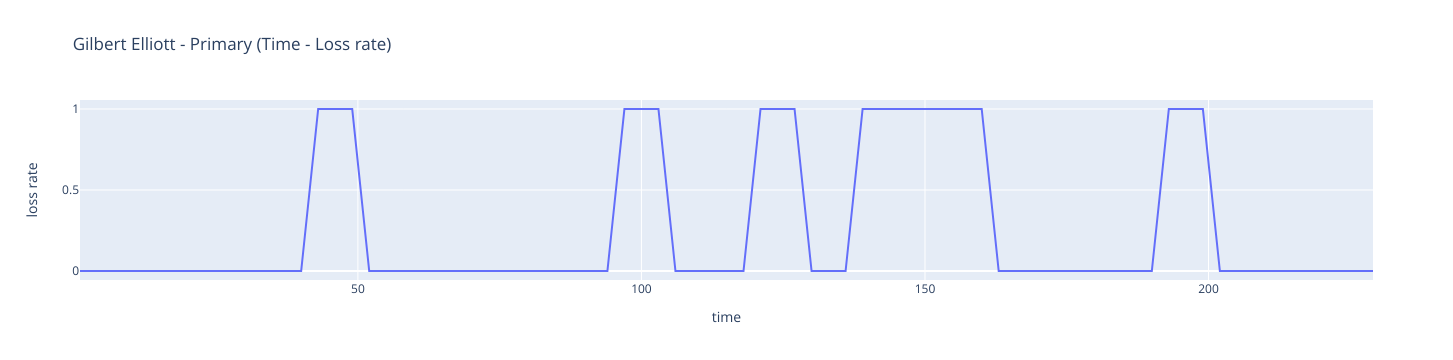

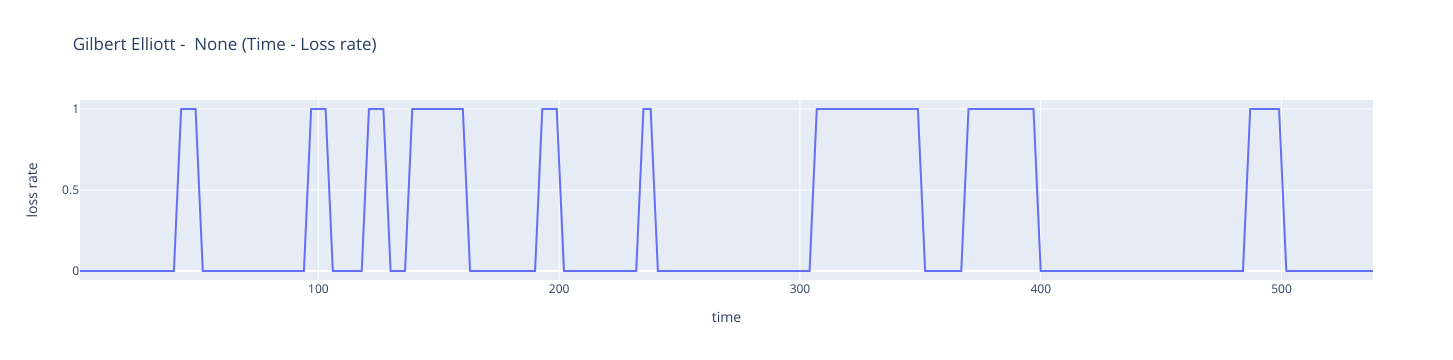

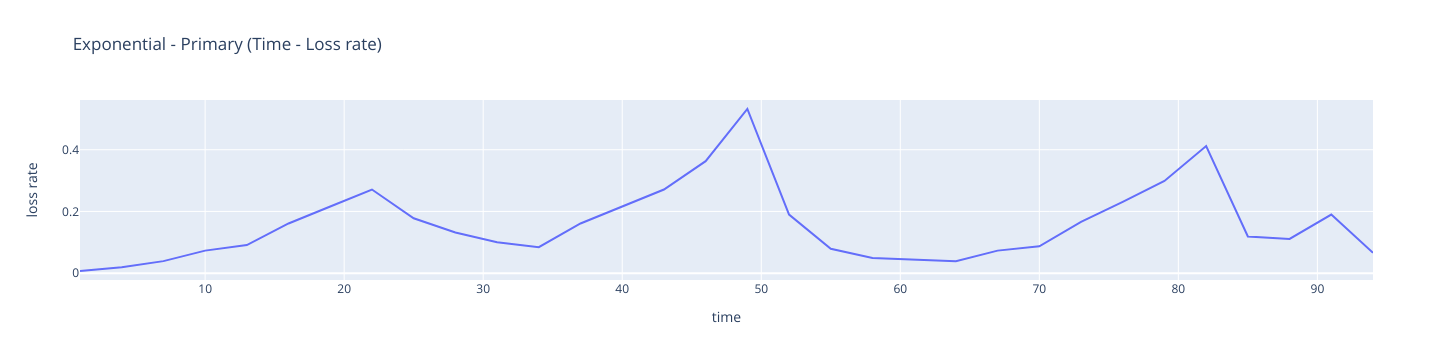

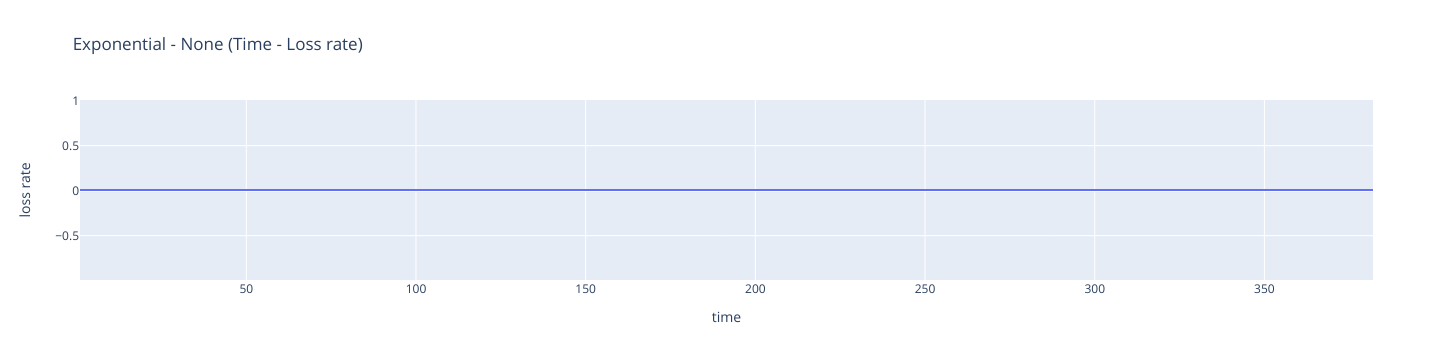

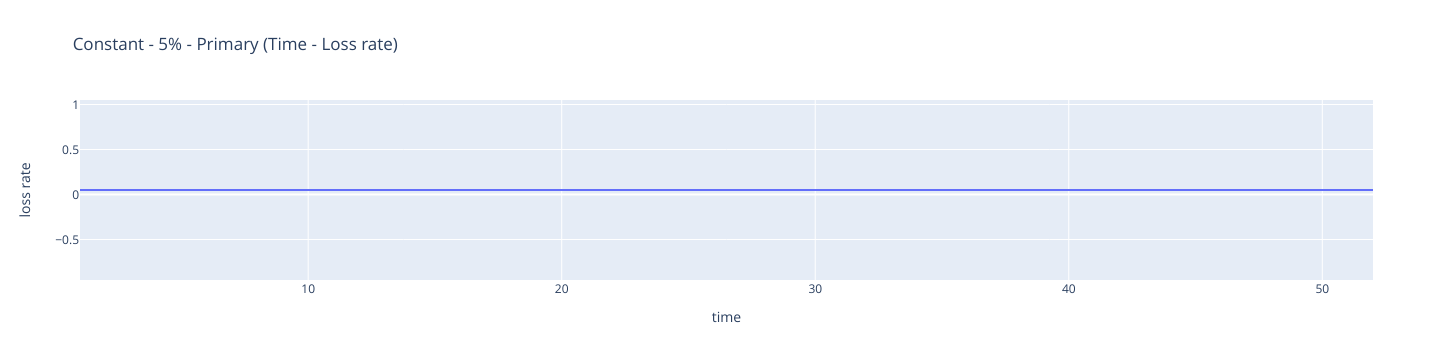

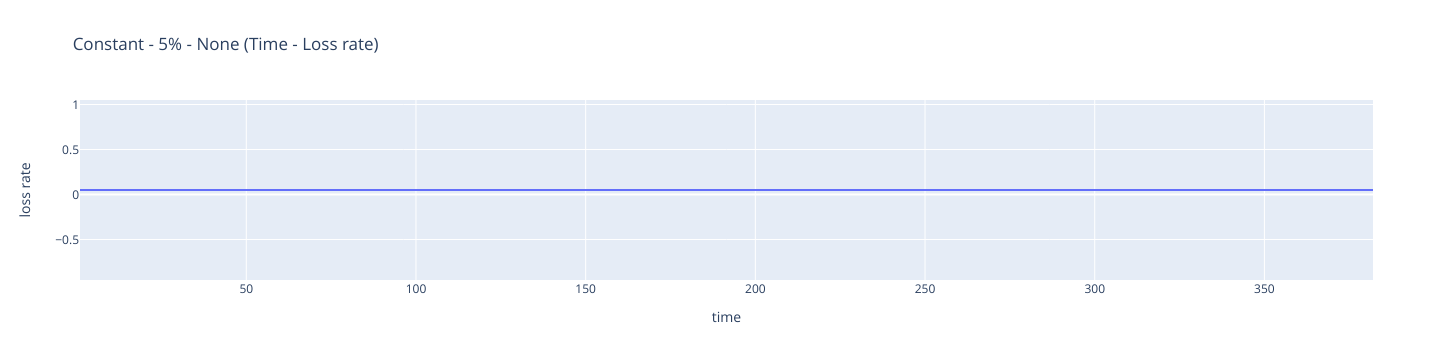

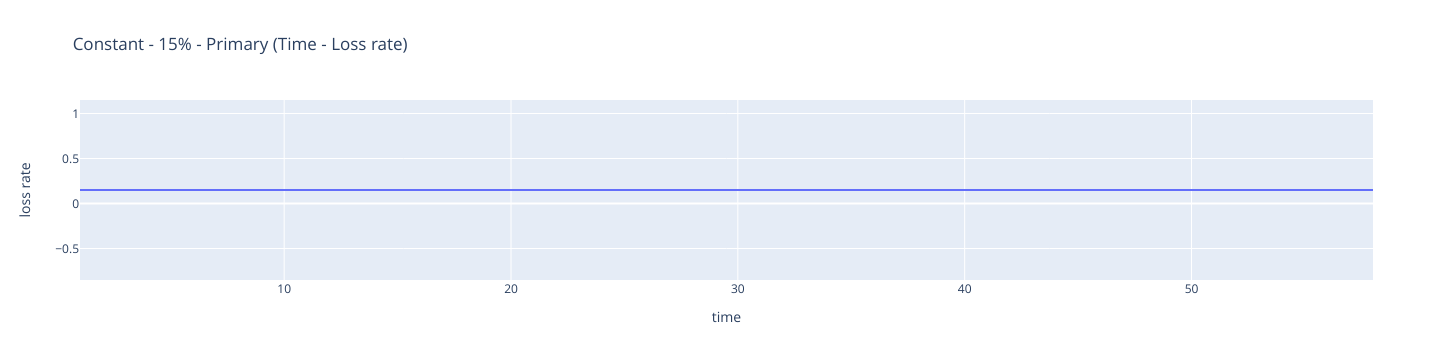

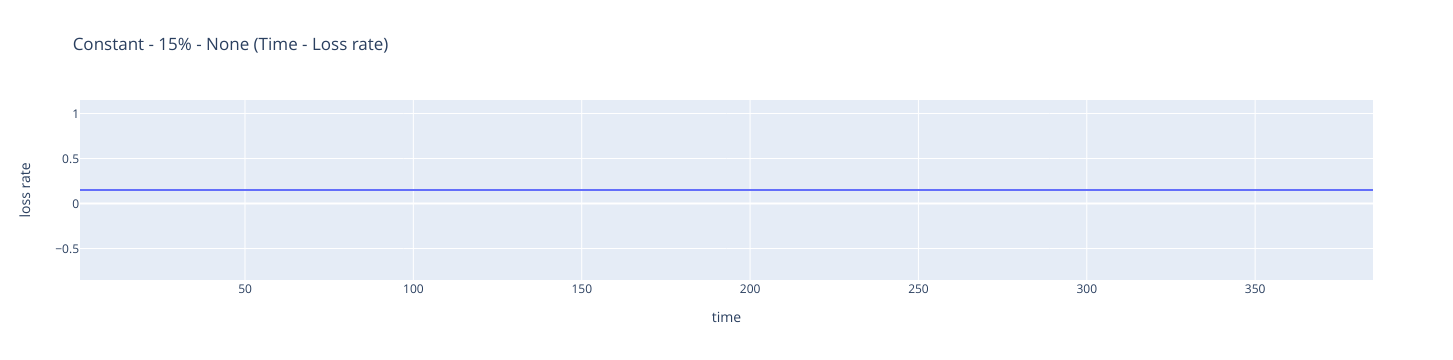

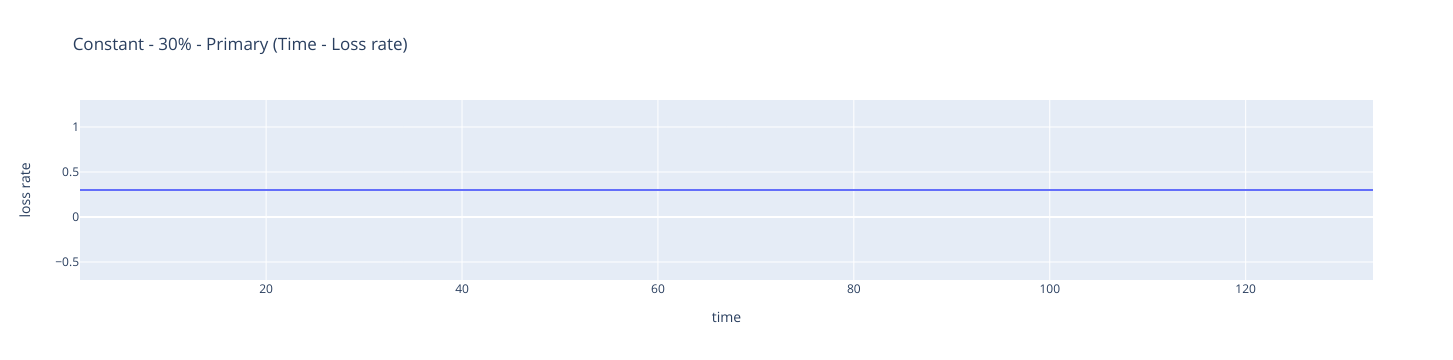

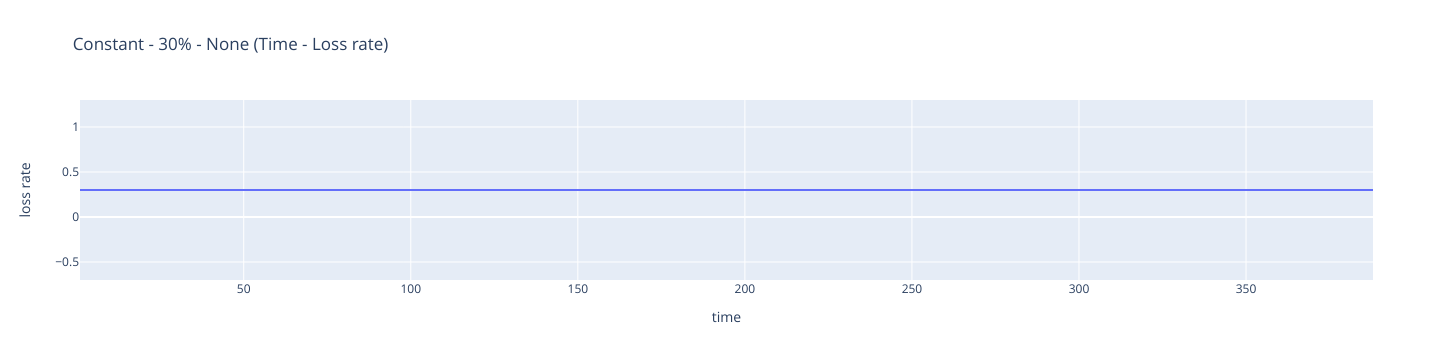

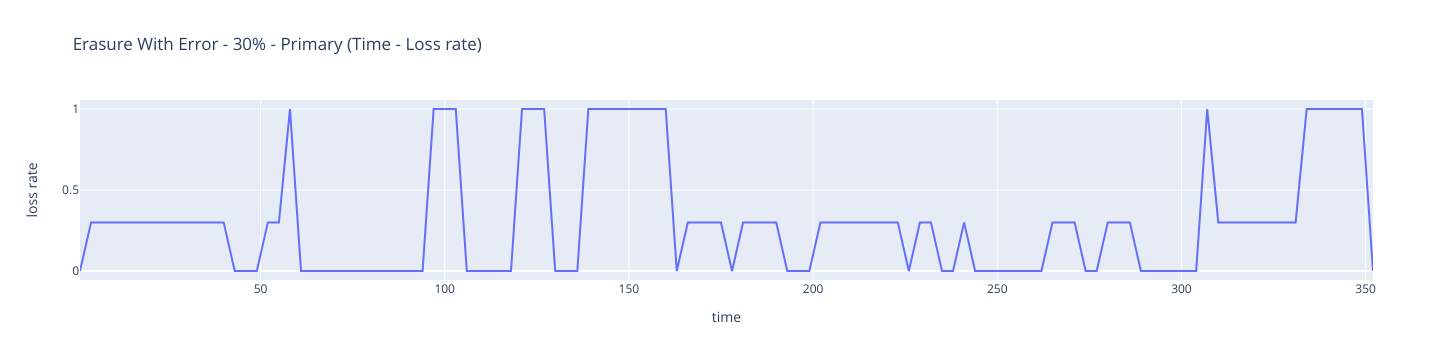

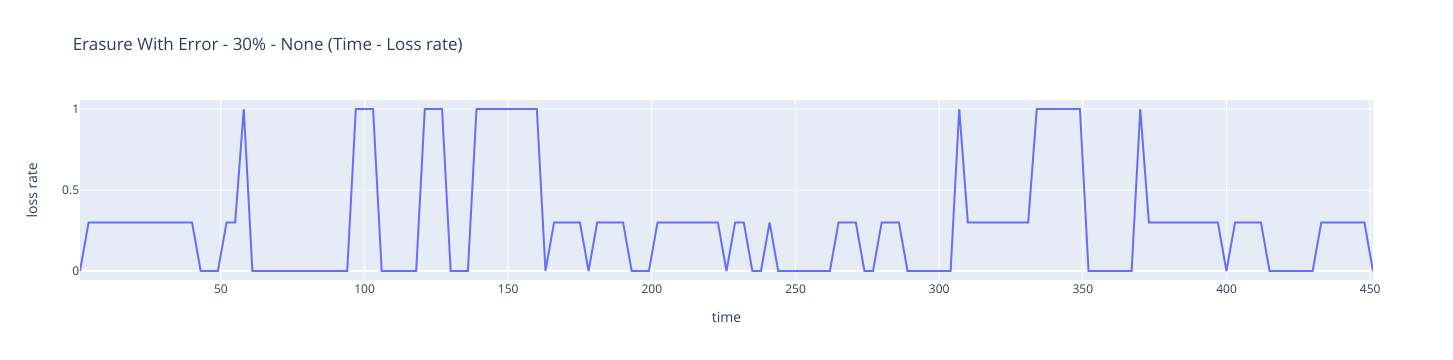

In [22]:
for index,sim in enumerate(sims):
    df=sim[0]
    name=df.name+' (Time - Loss rate)'
    fig = px.line(df.query("type=='send'"), x="time", y="loss rate", title=name)
    fig.show()
    fig.update_layout(title_text=None)
    fig.write_image(figues_path+name+".pdf")

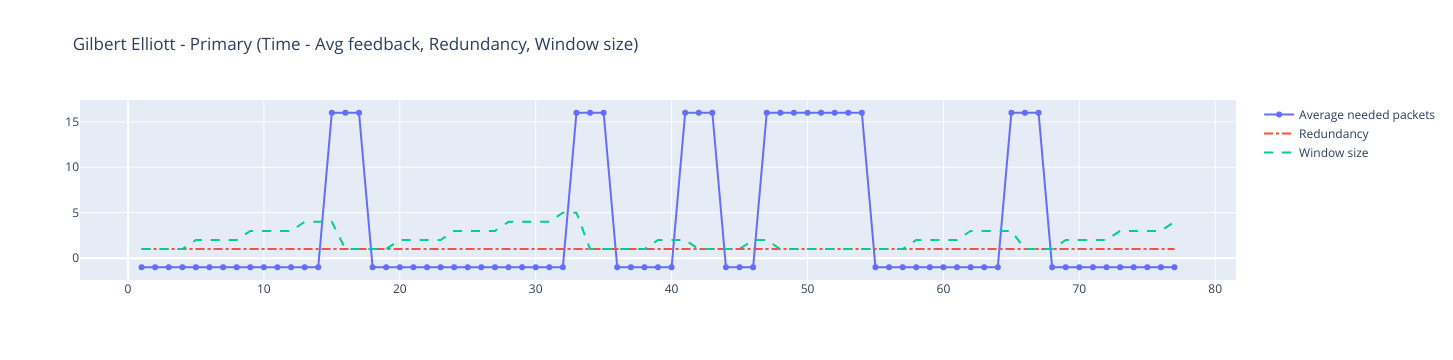

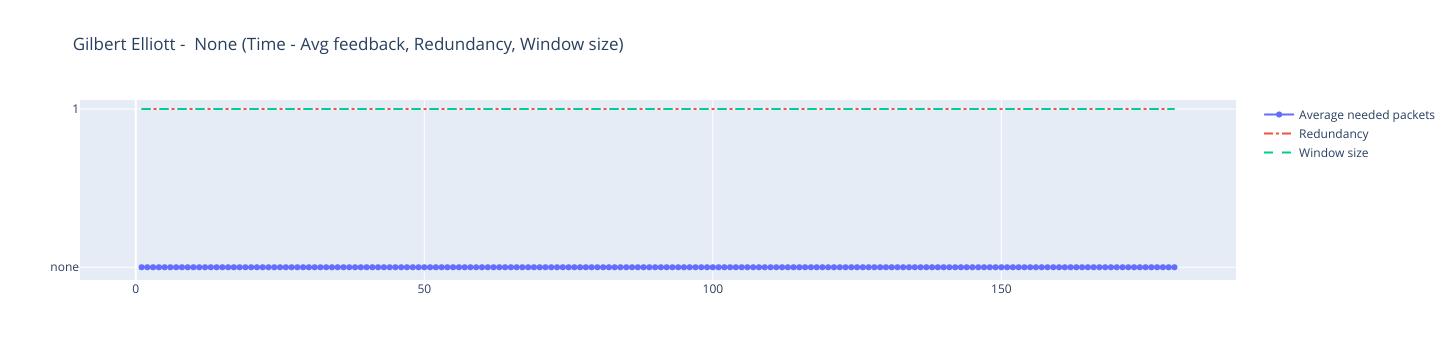

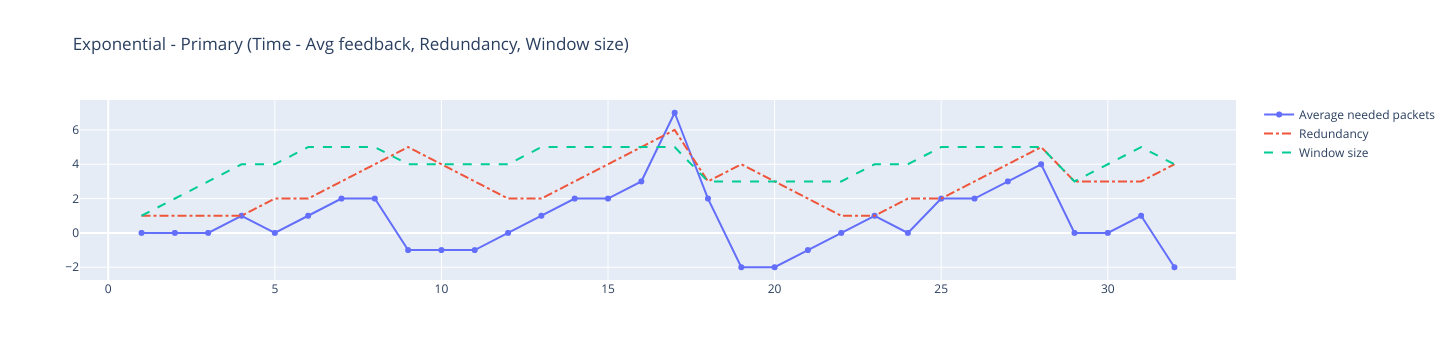

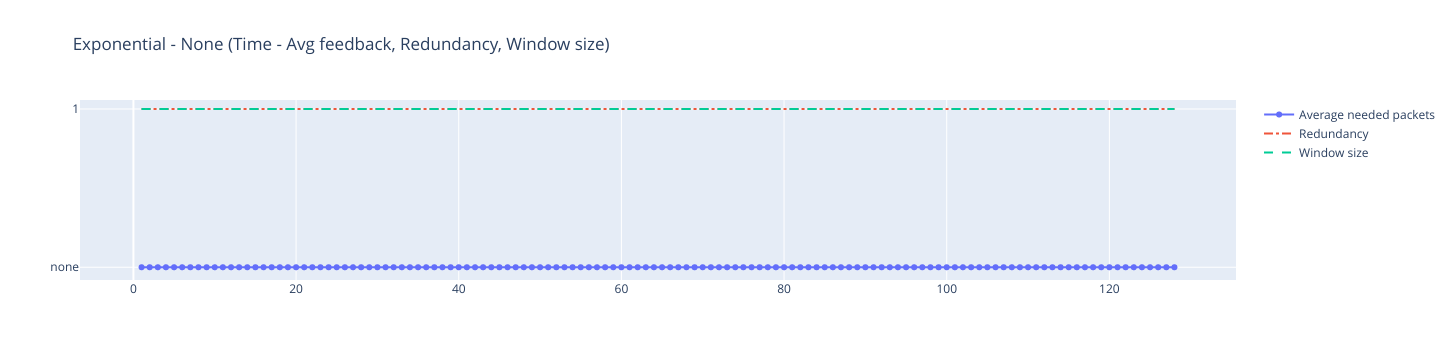

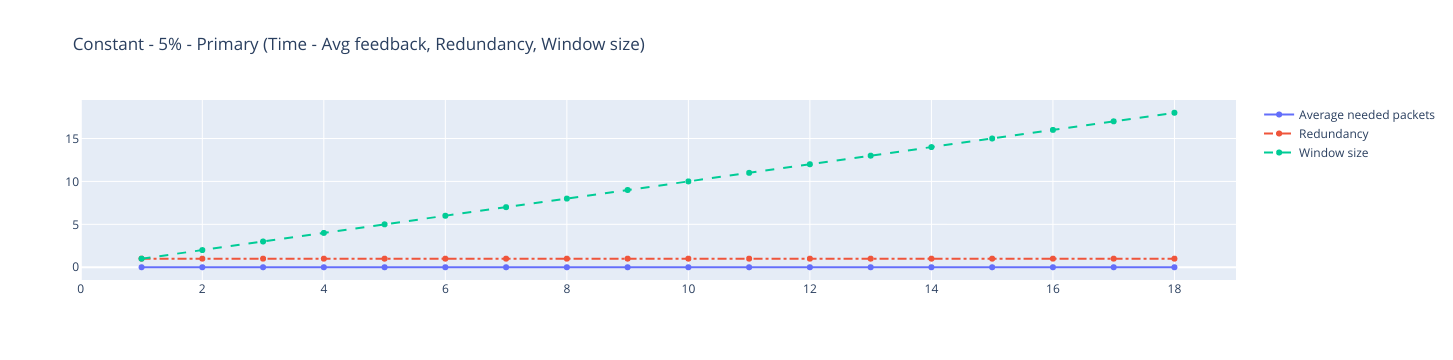

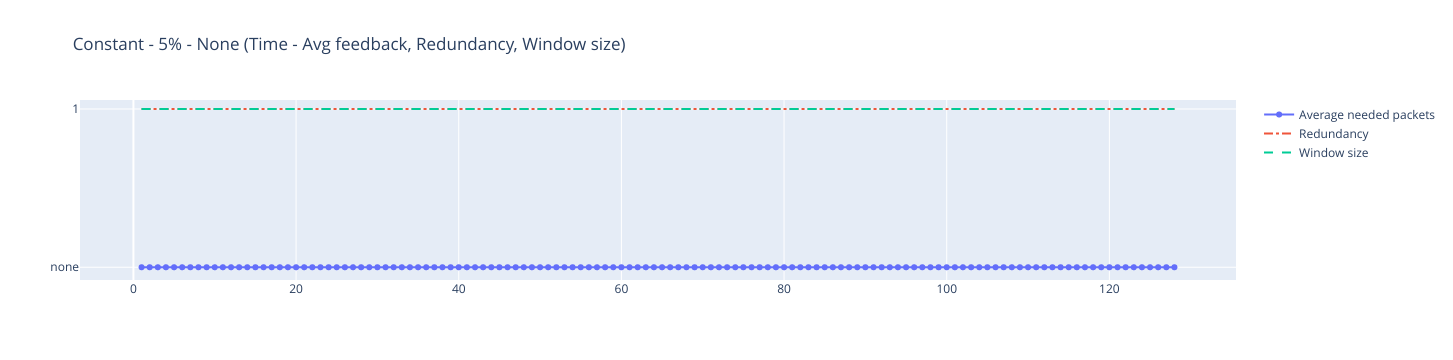

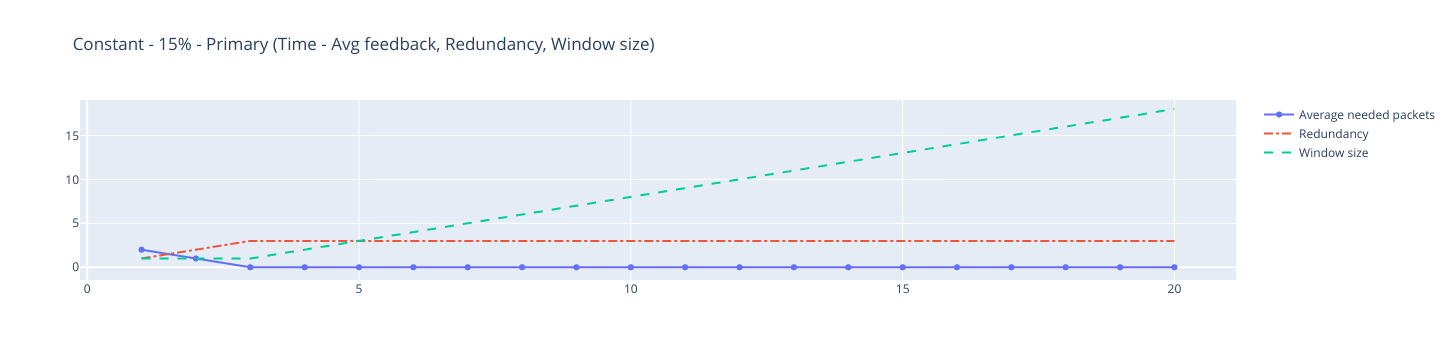

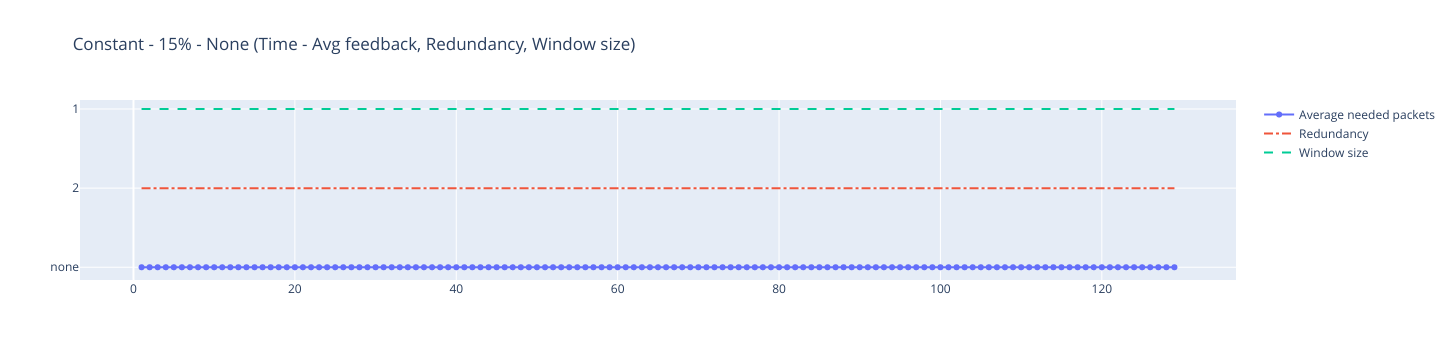

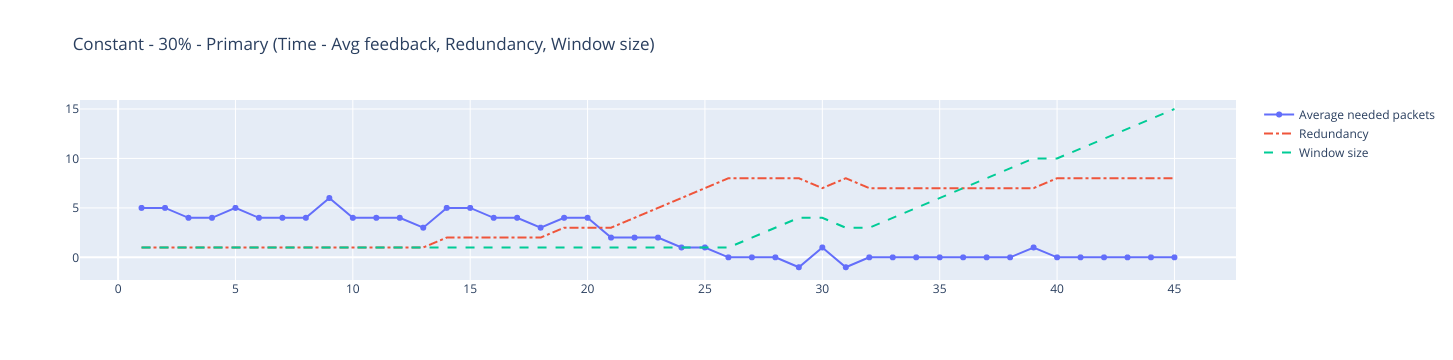

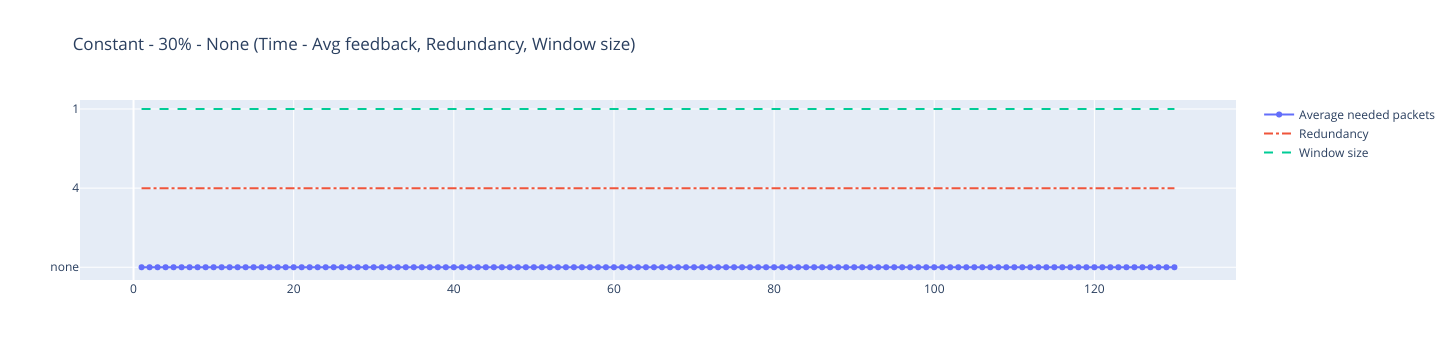

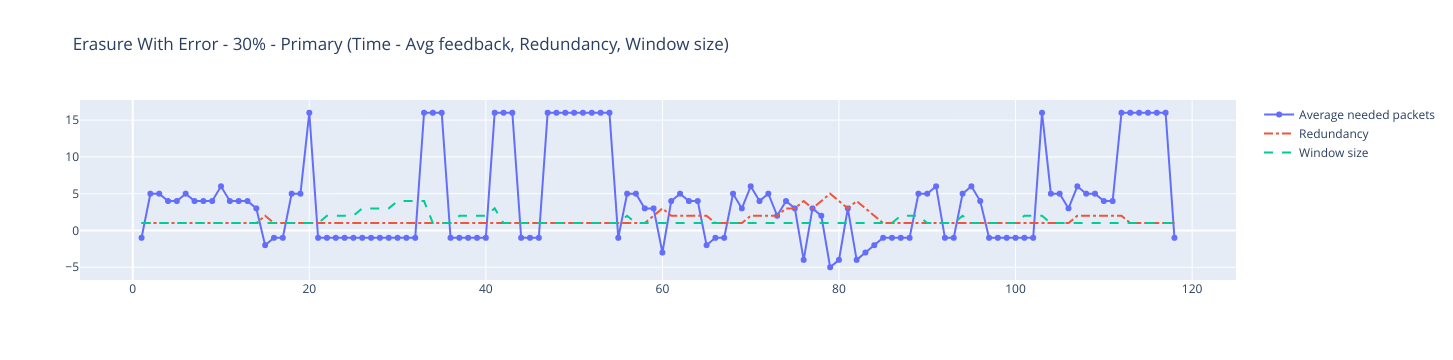

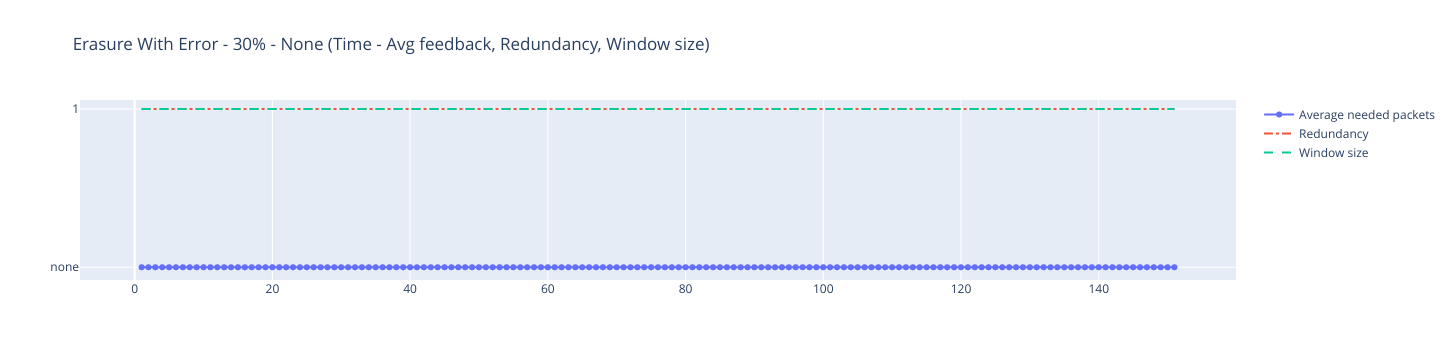

In [23]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Time - Avg feedback, Redundancy, Window size)'
    fig.update_layout(title_text=name,)


    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='feedback'")["average feedback"],
        mode="lines+markers",
        name="Average needed packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["redundancy"],
        line=dict( width=2, dash='dashdot'),
        name="Redundancy",
        textposition="top center"
    ))
    
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["window size"],
        line=dict( width=2, dash='dash'),
        name="Window size",
        textposition="top center"
    ))


    fig.show()
    fig.update_layout(title_text=None)
    fig.write_image(figues_path+name+".pdf")


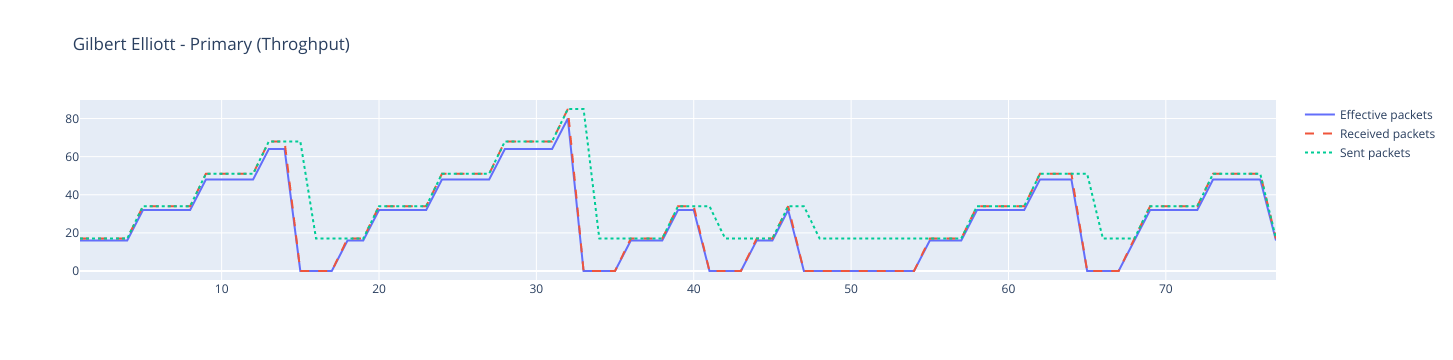

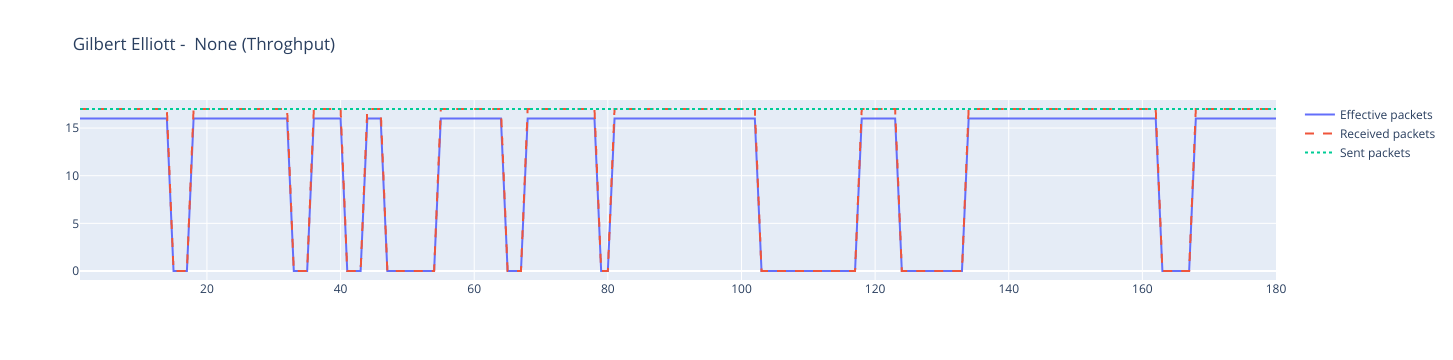

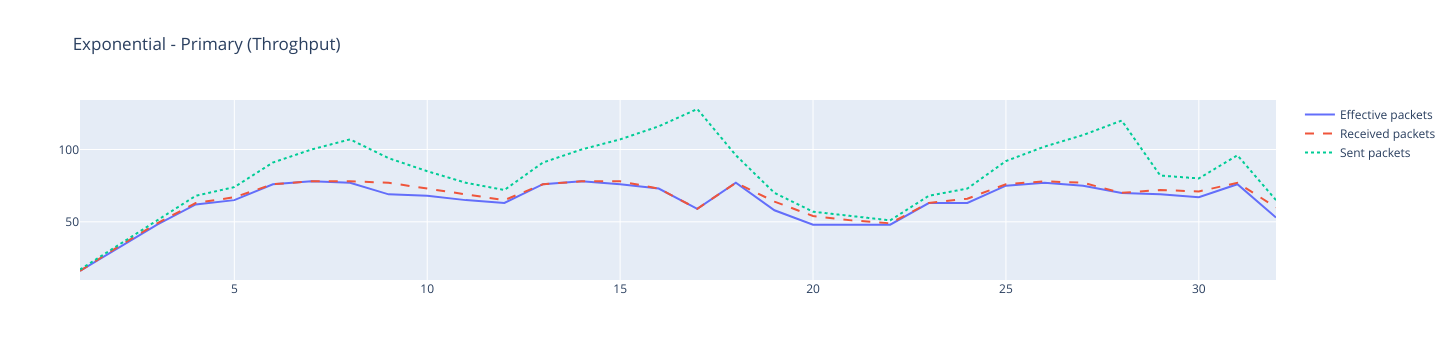

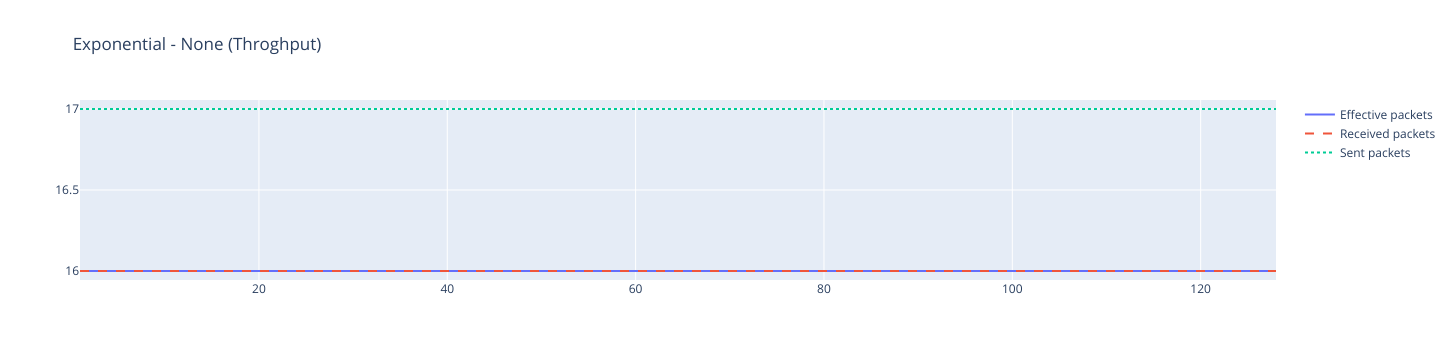

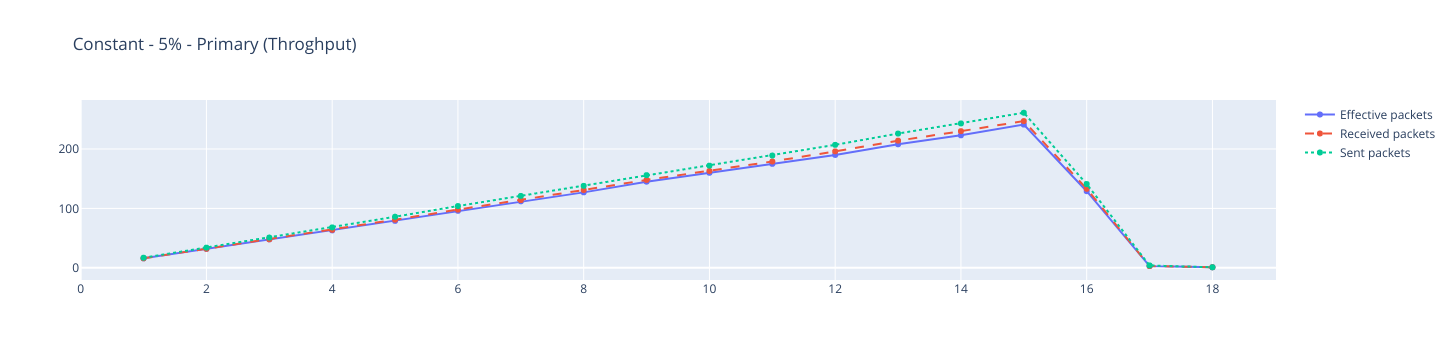

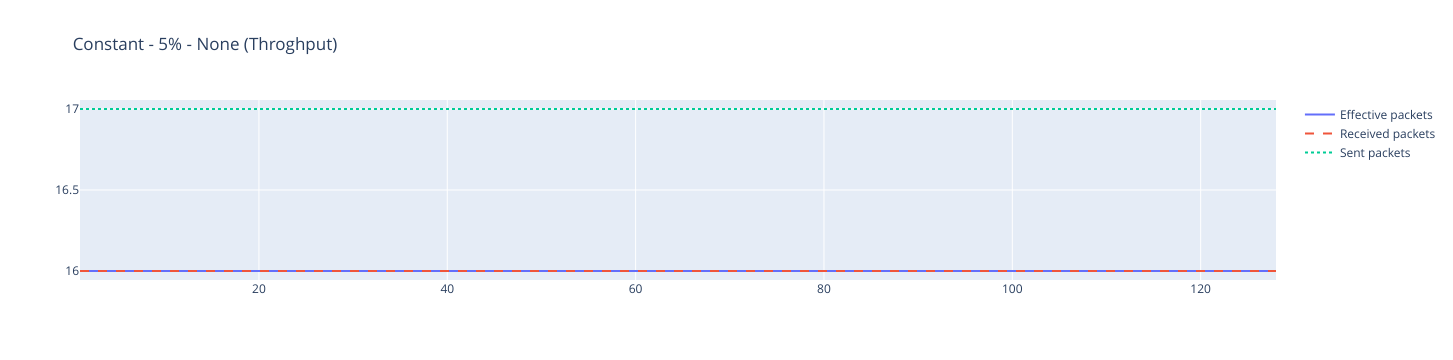

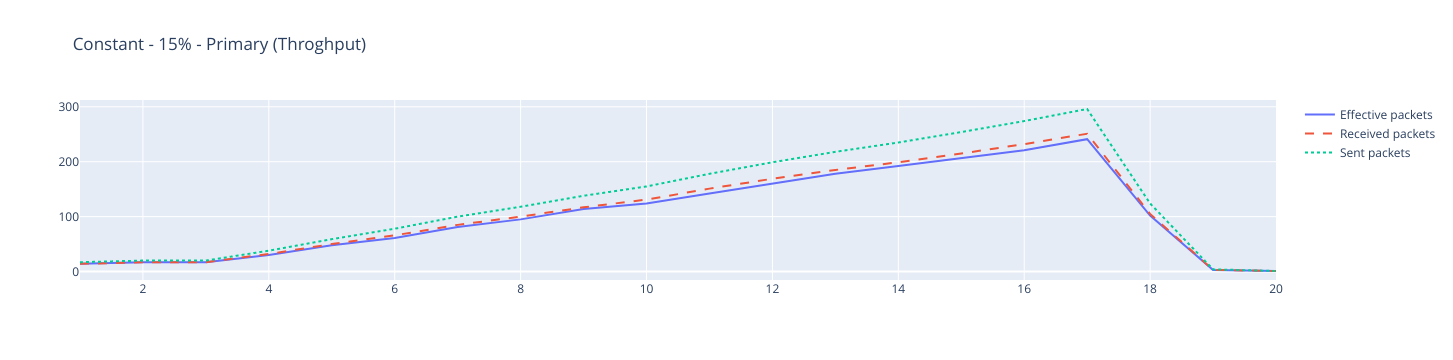

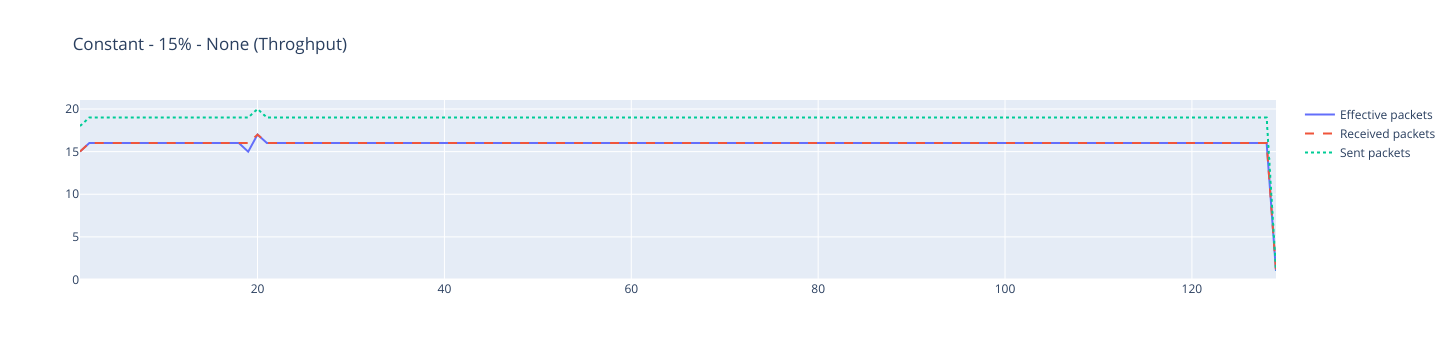

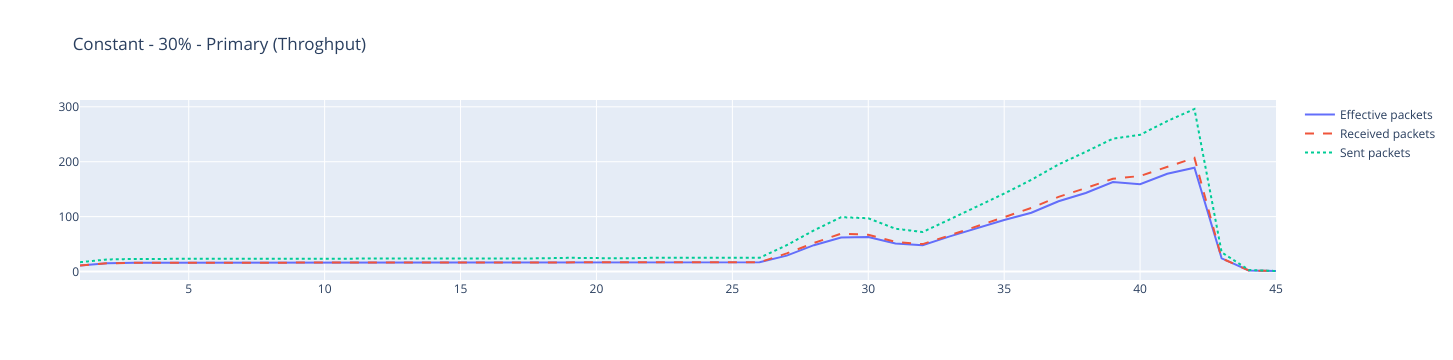

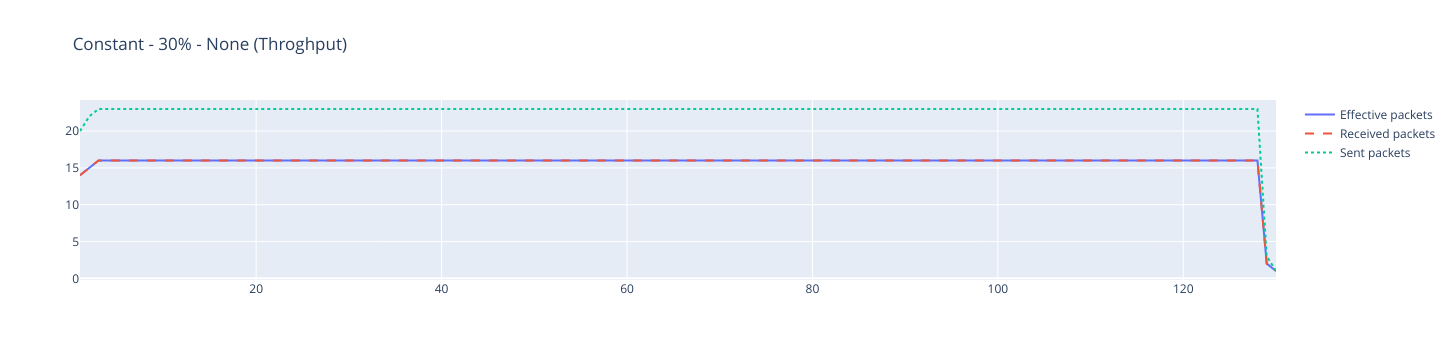

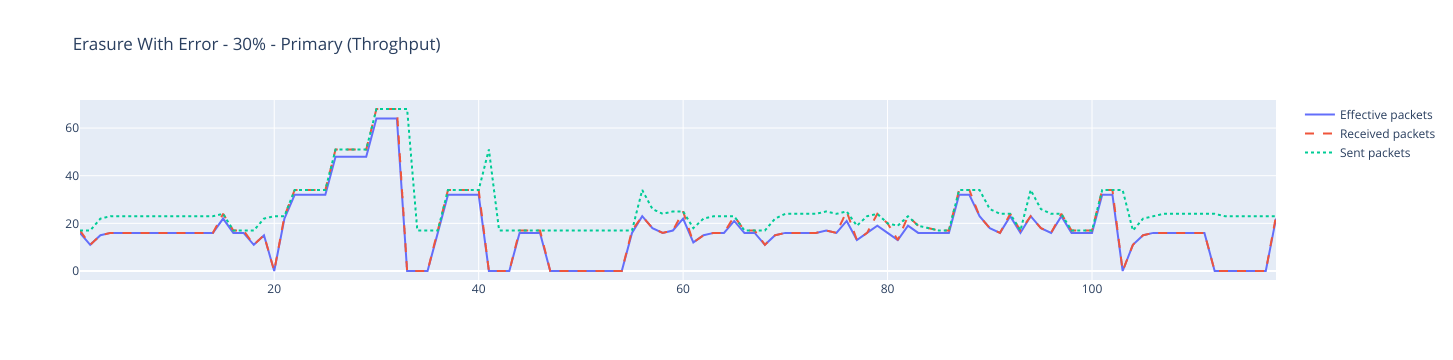

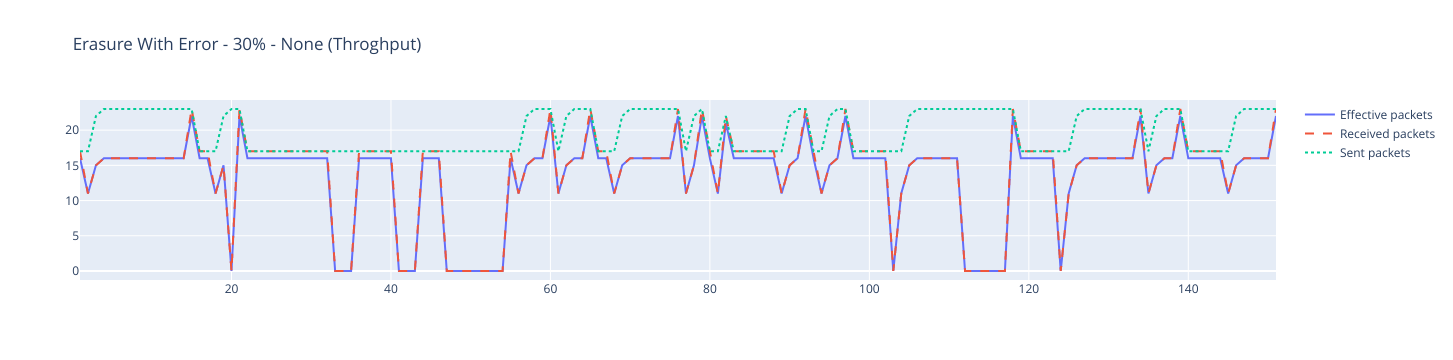

In [24]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Throghput)'
    fig.update_layout(title_text=name)

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["effective packets"],
        line=dict( width=2),
        name="Effective packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='receive'")["received packets"],
        line=dict(width=2, dash='dash'),
        name="Received packets",
        textposition="top center",
    ))

    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        line=dict(width=2, dash='dot'),
        name="Sent packets",
        textposition="top center",
    ))



    fig.show()
    fig.update_layout(title_text=None)
    fig.write_image(figues_path+name+".pdf")


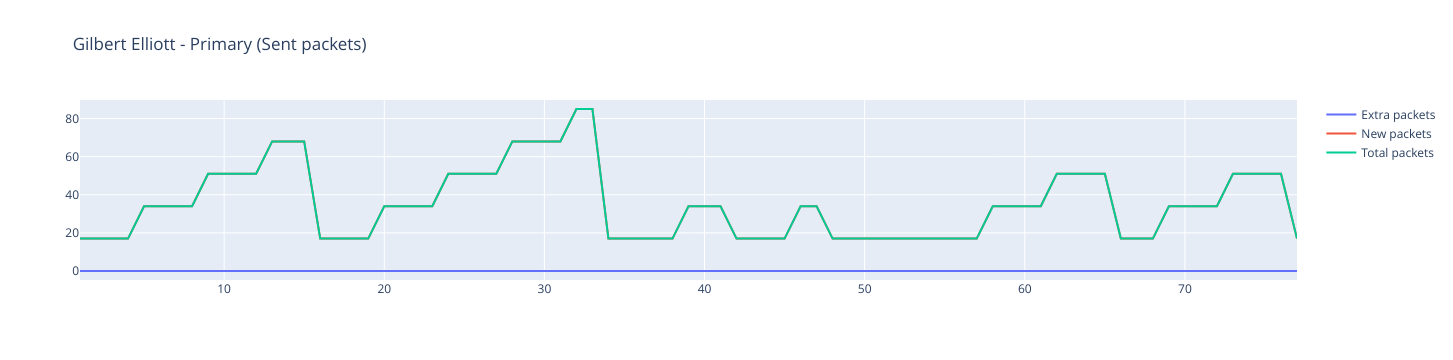

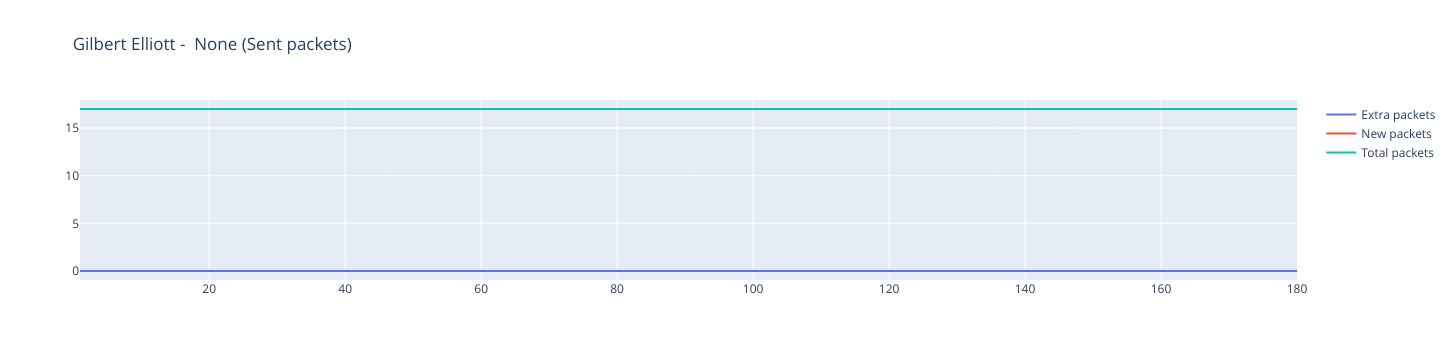

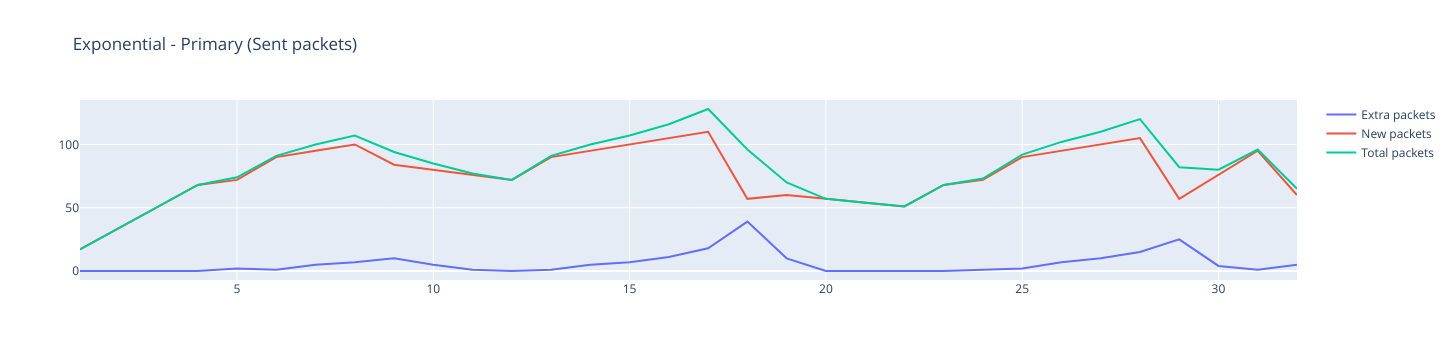

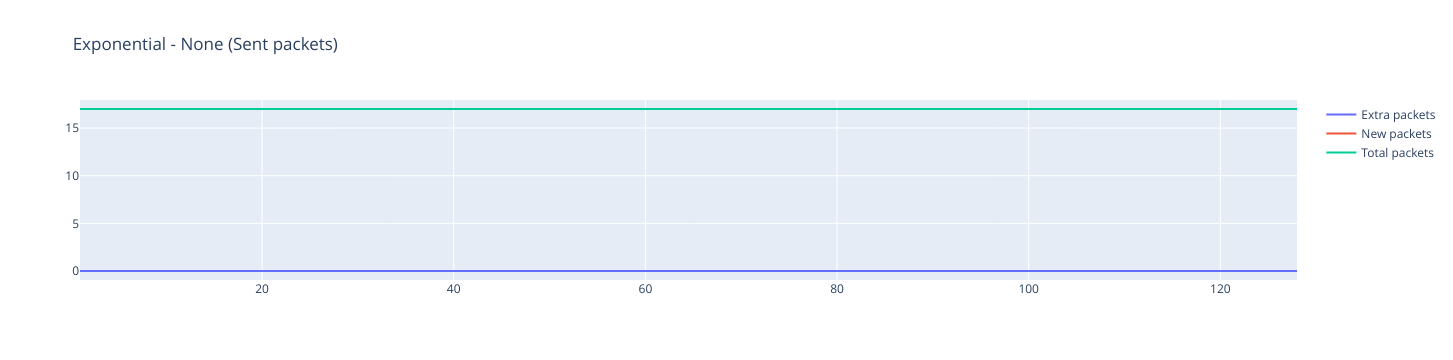

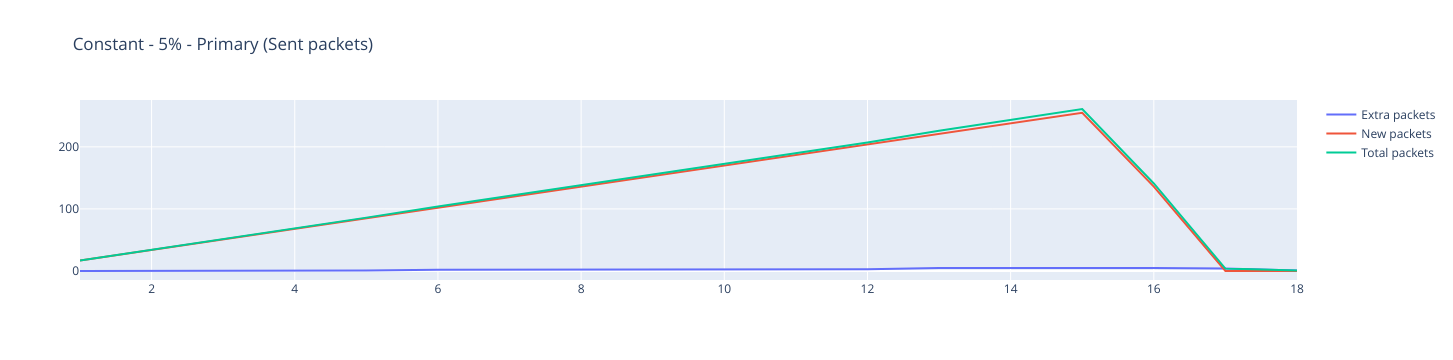

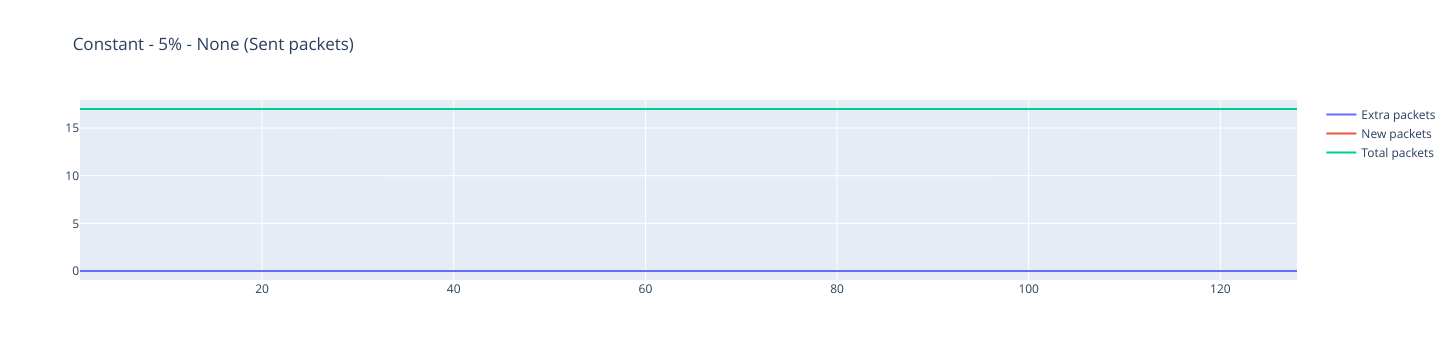

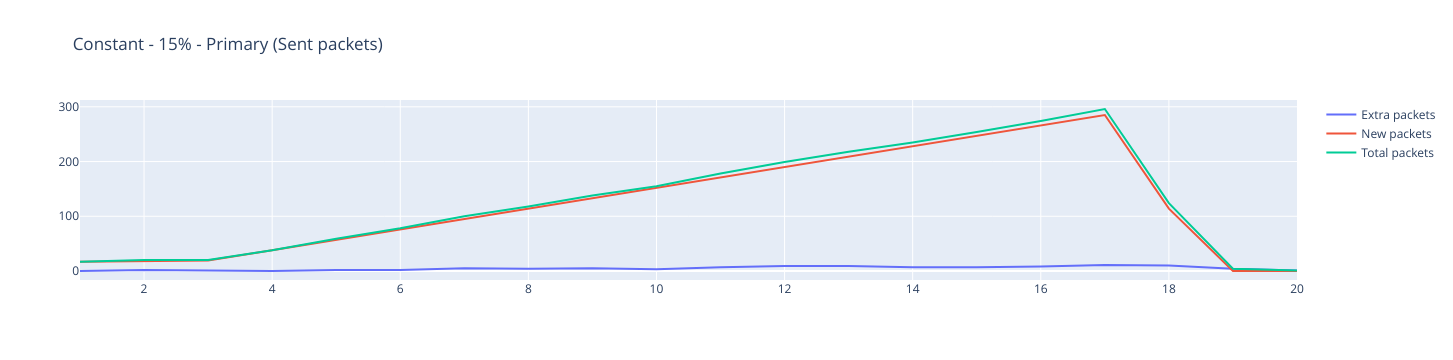

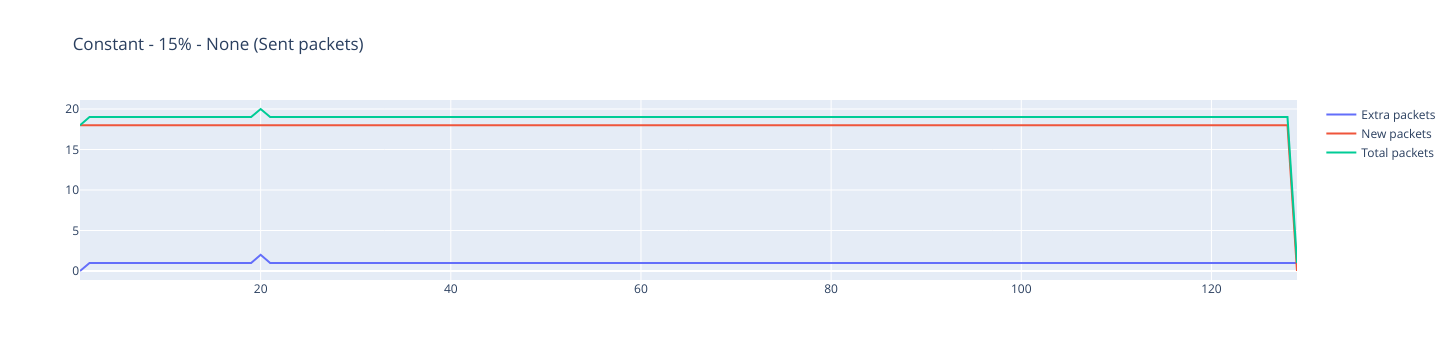

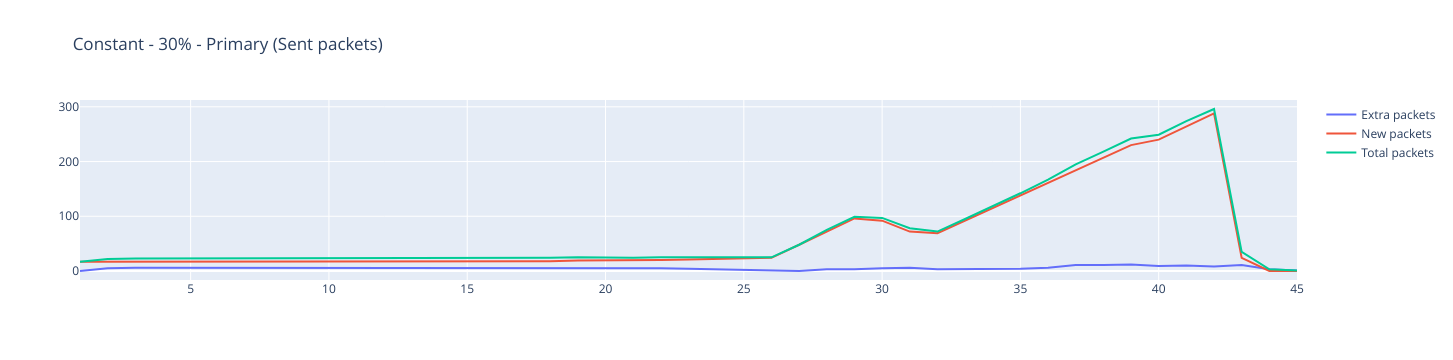

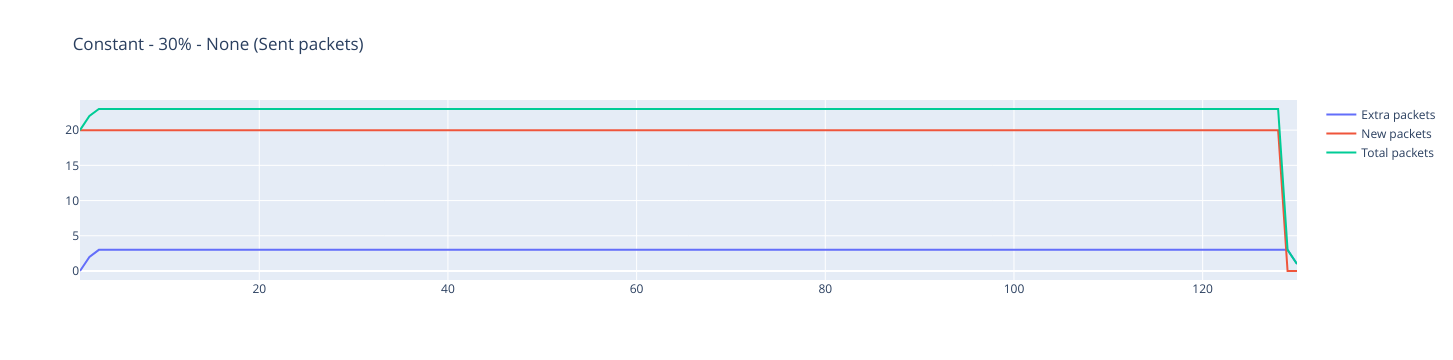

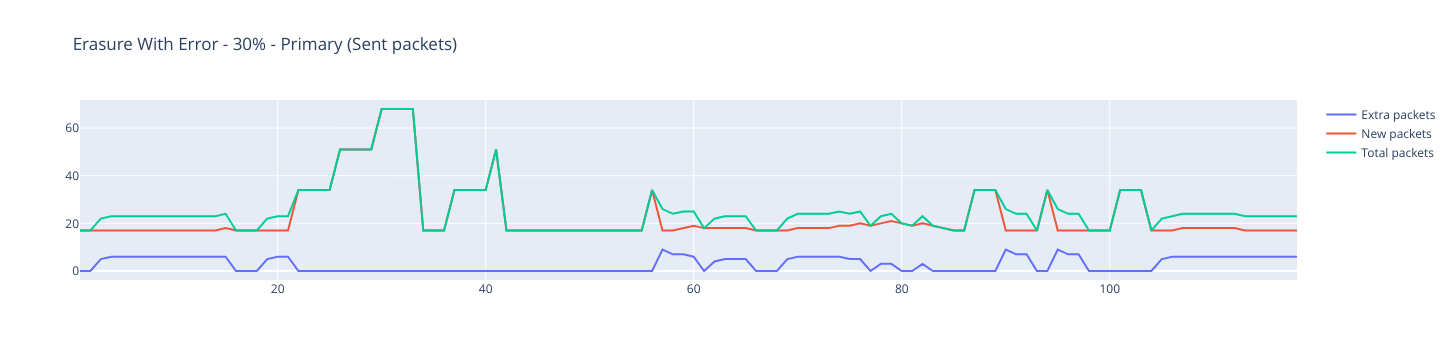

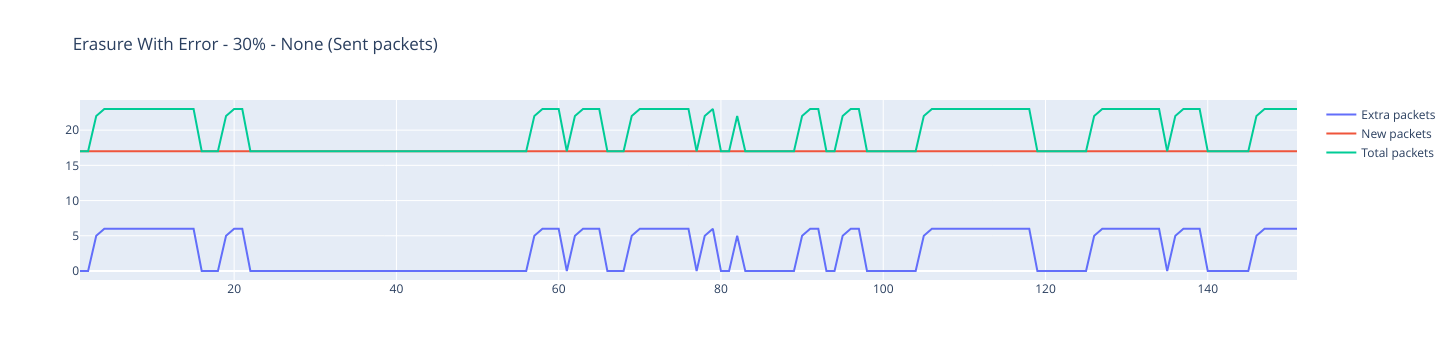

In [25]:
for index,sim in enumerate(sims):
    dataframe = sim[0]
    fig = go.Figure()
    name=dataframe.name+' (Sent packets)'
    fig.update_layout(title_text=name)
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["extra packets count"],
        mode="lines",
        name="Extra packets",
        textposition="top center",
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["new coded packets count"],
        mode="lines",
        name="New packets",
        textposition="top center",
    ))
    fig.add_trace(go.Scatter(
        x=dataframe["time"],
        y=dataframe.query("type=='send'")["total sent packets"],
        mode="lines",
        name="Total packets",
        textposition="top center",
    ))
    fig.show()
    fig.update_layout(title_text=None)
    fig.write_image(figues_path+name+".pdf")
